#Predicting Future Netflix Release by Country
####Spring 2024 Data Science Project
Collaborators: Aryan Bhupalam, Sai Chanda, Sai Thanneeru, Vasu Jaiswal



#Introduction

In recent years for entertainment, individuals have been watching more TV shows and movies on on demand and less in theaters, leading to streaming services generating more revenue than ever. The most popular streaming service right now is Netflix and they made $31.6 billion in revenue in 2021. However, their rise to prosperity wasn’t always evident. Moreover, changes in their entertainment led to this increase.

Rather than focusing on one demographic area, Netflix decided to their catalog to include movies and shows from various countries where film is prominent – namely India, United Kingdom and South Korea. Given these positive results and a diverse selection of content, our group wanted to predict the number of future Netflix releases by country.

Right now, theaters are seeing losses since movie-going is not as popular as it used to be. On the other hand, streaming services are extremely popular. It’s important to understand how demographics play a role in the success of an entertainment firm like Netflix; We wanted to answer if Netflix may continue to diversify their catalog using data analysis and predictive modeling.




#Data Curation

In this section, we will use the pandas to describe the data and look for patterns to potentially perform our data analysis on. In particular, we are highlighting the years and countries with the most titles.


* Pandas will be highlight key points in the data as well as clean the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from sklearn.linear_model import LinearRegression
from datetime import datetime

We will be using a dataset consisting of netflix data which includes titles of a show or movie and relative categories. All of our data comes from the following Kaggle link: https://www.kaggle.com/datasets/shivamb/netflix-shows/discussion/279376

The following dataset contains 12 different columns including the title of a piece of content. Moreover, there are 8807 different titles, so there is plenty of data to work with.

In [ ]:
# Read netflix data into the dataset
netflix_df = pd.read_csv('/content/netflix_titles.csv')

In [ ]:
netflix_columns = netflix_df.shape[1]
netflix_rows = netflix_df.shape[0]

# Displaying the initial structure of the dataset
print("Categories in the dataset: ")
print(netflix_columns)
print("Entries in the dataset: ")
print(netflix_rows)

Categories in the dataset: 
12
Entries in the dataset: 
8807


In [ ]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

The columns in this dataset are explained with context:

* show_id: The entry ID of the title in the dataset
* type: The title of the content is either TV Show or Movie
* title: The title of the TV Show or Movie
* director: This is the director or creator of the content
* cast: This is the main cast of the listed entry in the dataset
* country: This is the counry in which the movie or TV Show was made in
* date_added: This was the date that netflix added this content
* release_year: This was the year that the show or movie was originally released
* rating: This is the TV rating (by age) or movie rating (PG to R) given to the movie.
* duration: the runtime of the TV Show (by seasons) or movie (by minutes)
* listed_in: The genre that this content fits into
* description: The general description and overview of the movie/TV Show

In [ ]:
content_by_country = netflix_df['country'].value_counts()
print(content_by_country.head(20))

country
United States                    2818
India                             972
United Kingdom                    419
Japan                             245
South Korea                       199
Canada                            181
Spain                             145
France                            124
Mexico                            110
Egypt                             106
Turkey                            105
Nigeria                            95
Australia                          87
Taiwan                             81
Indonesia                          79
Brazil                             77
Philippines                        75
United Kingdom, United States      75
United States, Canada              73
Germany                            67
Name: count, dtype: int64


Above, we can see that the most common titles by country are countries primarily in Asia and Europe apart from the United States. This finding will be instrumental in doing the predictive model the primary analysis part of the project. From this descriptive analytic, we can infer that viewership is also steadily present in other countries outside of the United States.

Below, we also listed that the United States is an outlier since it is the largest country in terms of netflix titles. Therefore, we would consider leaving the United States out of this dataset and see how many titles of other countries may be added in the future.

In [ ]:
over_represented_feature = netflix_df['country'].value_counts().idxmax()

print(f"The country with the most number of movies in this dataset is the {over_represented_feature}.")
print(f"They have 2058 total movies -- {movies_by_country[0] - movies_by_country[1]} more movies than those of the next country, India.")

The country with the most number of movies in this dataset is the United States.
They have 2058 total movies -- 1846 more movies than those of the next country, India.


In [ ]:
content_by_date = netflix_df['date_added'].value_counts()
print(content_by_date.head(20))

date_added
01/01/2020    110
11/01/2019     91
03/01/2018     75
12/31/2019     74
10/01/2018     71
10/01/2019     62
11/01/2018     60
07/01/2021     60
09/01/2021     56
01/01/2018     55
07/01/2019     52
06/02/2021     51
01/01/2021     49
10/01/2017     47
04/01/2018     44
04/01/2020     43
07/01/2017     42
05/01/2018     42
02/01/2019     41
07/01/2018     40
Name: count, dtype: int64


###Data Cleaning

Here, our group decided to clean the dataset by converting the date_added clumn from a string format to a month/day/year format. For example, we would change "September 24th, 2019" to "09/24/19" if such a date exists. We would scale this across the whole date_added column.

In [ ]:
# Convert date_added to "00/00/0000" format
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')

# Extract year from 'date_added'
netflix_df['year_added'] = netflix_df['date_added'].dt.year

# Drop rows where 'country' or 'year_added' is missing
netflix_df = netflix_df.dropna(subset=['country', 'year_added'])

# Display cleaned data and check for missing values in the relevant columns
netflix_df.info(), netflix_df.head()

# Group by country and year_added, and count the number of releases
release_counts = netflix_df.groupby(['country', 'year_added']).size().reset_index(name='release_count')

netflix_df

<class 'pandas.core.frame.DataFrame'>
Index: 7967 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7967 non-null   object        
 1   type          7967 non-null   object        
 2   title         7967 non-null   object        
 3   director      5751 non-null   object        
 4   cast          7296 non-null   object        
 5   country       7967 non-null   object        
 6   date_added    7967 non-null   datetime64[ns]
 7   release_year  7967 non-null   int64         
 8   rating        7964 non-null   object        
 9   duration      7964 non-null   object        
 10  listed_in     7967 non-null   object        
 11  description   7967 non-null   object        
 12  year_added    7967 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(10)
memory usage: 840.3+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,2016
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020


#Exploratory Data Analysis


In this section, we will use the pandas, matplotlib and scipy libraries to pre-process and do the necessary data analysis.


* Pandas will be used for supporting information in the graphs

* Matplotlib will be used to create necessary graphs that enhance the data to viewers

* The Scipy library, specifically chi2_contingency, will be used for doing a chi-squared test

* Moreover, f_oneway function will be used for doing ANOVA test

In all, the chi-square test and ANOVA test will be used to support our understanding of netflix's range of entertainment by country and release year

1. Chi-Square Test

Null Hypothesis: There is no significant association between the type of content (TV show or movie) and country it was made in.

Alternative Hypothesis: There exists a significiant association between the type of content (TV show or movie) and country it was made in.

(Our alpha value is the defualt value of 0.05)

In [ ]:
# Preparing data for Chi-Square Test
contingency_table = pd.crosstab(netflix_df['type'], netflix_df['country'])

# Performing Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("\nSignificant association found between content type and country.")
else:
    print("\nNo significant association found.")


Chi-Square Test Results:
Chi-Square Statistic: 1781.5498713497882
P-value: 3.2355824449290966e-86

Significant association found between content type and country.


Based on the p-value of the chi-square test, we can reject the null hypothesis. This indicates we can
conlude that there is a significant association association between the type of content (TV show or movie) and the country it was made in.

<Figure size 1200x800 with 0 Axes>

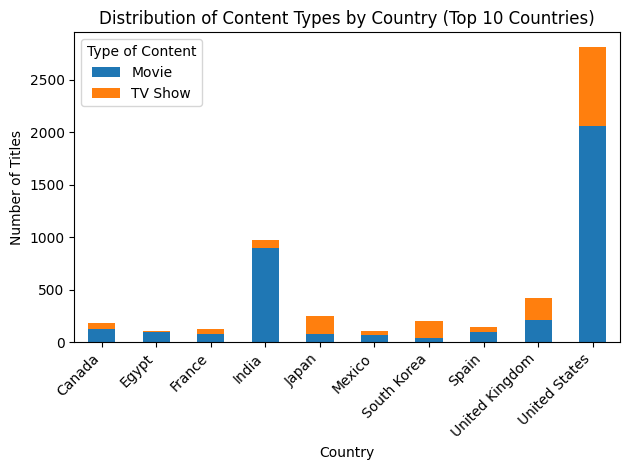

In [ ]:
top_countries = netflix_df['country'].value_counts().head(10).index

filtered_df = netflix_df[netflix_df['country'].isin(top_countries)]

country_counts = filtered_df.groupby('country')['type'].value_counts().unstack().fillna(0)

plt.figure(figsize=(12, 8))
country_counts.plot(kind='bar', stacked=True)
plt.title('Distribution of Content Types by Country (Top 10 Countries)')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.legend(title='Type of Content')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

2. ANOVA TEST

We are using an ANOVA test to determine if there are significant differences in the frequency of the content added by date. Since there are many dates with very little entires, we are simplifying to the top 20 dates.

Null Hypothesis: The frequency of content by the date_added is very similar across the top 20 dates.

Alternative Hypothesis: The frequency of content by the date_added significantly differs by the top 20 dates.

In [ ]:
from scipy.stats import f_oneway
import numpy as np

# Create a contingency table
contingency_table = pd.crosstab(netflix_df['country'], netflix_df['date_added'])

# Perform ANOVA test
f_statistic, p_value = f_oneway(*[contingency_table[col] for col in contingency_table.columns])

print("ANOVA Test Results:")
print("F-statistic:", f_statistic)
print("P-value:", p_value)


ANOVA Test Results:
F-statistic: 2.1678416668771203
P-value: 2.873547418342116e-146


Based on the p-value, we can see that it is less than 0.05. This means we can reject the bull hypothesis that the frequency of content by the date_aded is very similar across the top 20 dates.

This allows us to believe that more Netflix content across all demographic regions were added more recently, meaning that w

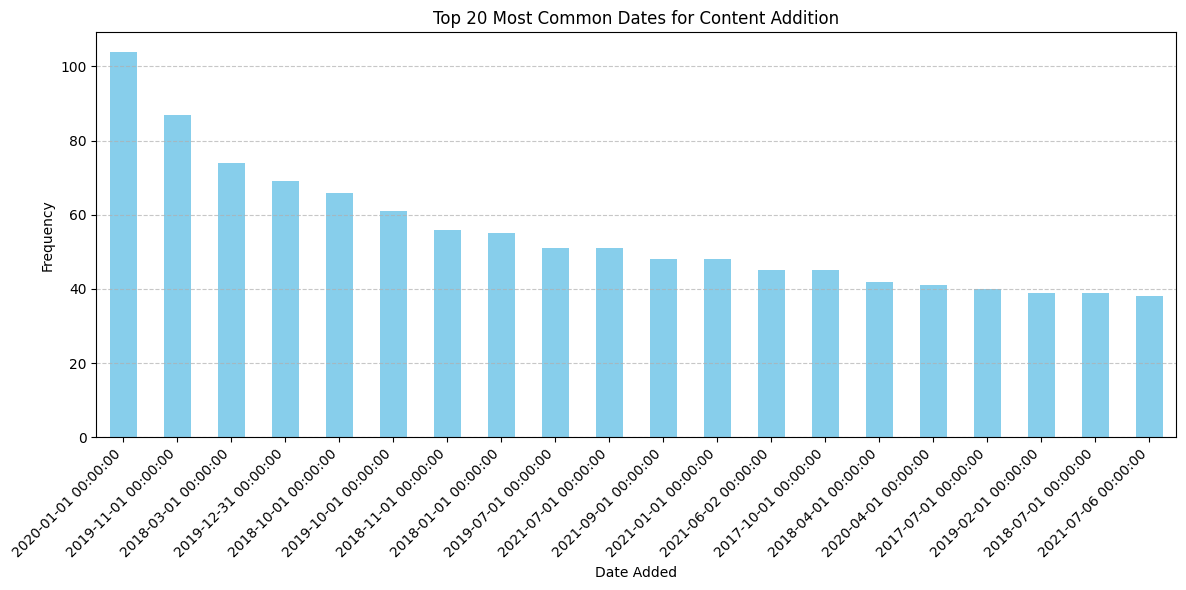

In [ ]:
date_counts = netflix_df['date_added'].value_counts().head(20)

plt.figure(figsize=(12, 6))
date_counts.plot(kind='bar', color='skyblue')
plt.title('Top 20 Most Common Dates for Content Addition')
plt.xlabel('Date Added')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Primary Analysis and Visualization

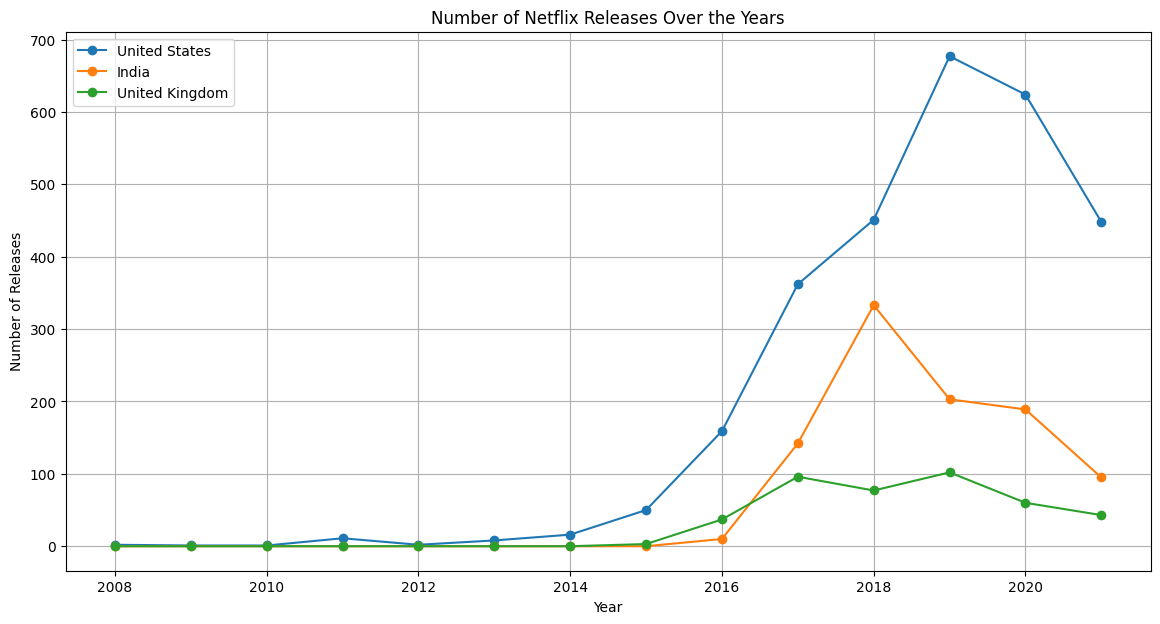

In [ ]:
# Pivot data for better visualization and model input preparation
pivot_releases = release_counts.pivot_table(index='year_added', columns='country', values='release_count', fill_value=0)

# Display the aggregated data
pivot_releases.head(), pivot_releases.tail()
import matplotlib.pyplot as plt

# Selecting a few major countries for visualization
countries_to_plot = ['United States', 'India', 'United Kingdom']

# Plotting the number of releases over the years for selected countries
plt.figure(figsize=(14, 7))
for country in countries_to_plot:
    if country in pivot_releases.columns:
        plt.plot(pivot_releases.index, pivot_releases[country], marker='o', label=country)

plt.title('Number of Netflix Releases Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.legend()
plt.grid(True)
plt.show()

Top 3 countries

<ipython-input-15-727c51758b69>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df['year_added'] = netflix_df['date_added'].dt.year
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


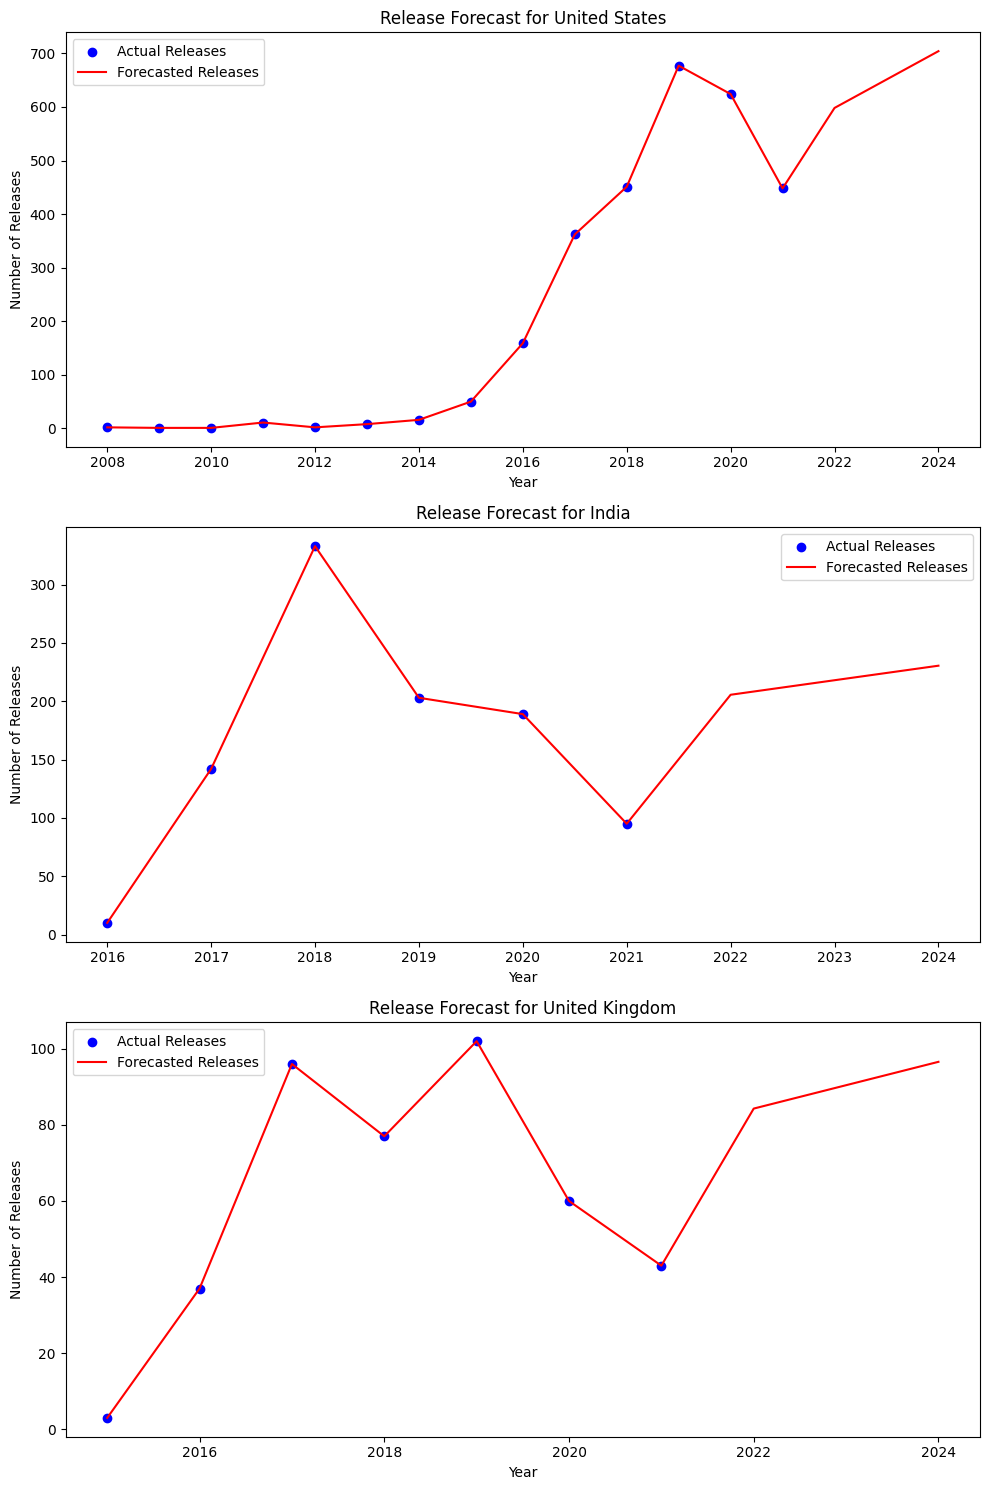

In [ ]:
# Convert 'date_added' to datetime
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')

# Drop rows where 'date_added' or 'country' is missing
netflix_df = netflix_df.dropna(subset=['country', 'date_added'])

# Extract year for regression
netflix_df['year_added'] = netflix_df['date_added'].dt.year

# Filter for the top 3 countries with the most releases
top_countries = netflix_df['country'].value_counts().nlargest(3).index

# Prepare data for regression
filtered_data = netflix_df[netflix_df['country'].isin(top_countries)]

# Prepare the plotting
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

for i, country in enumerate(top_countries):
    # Filter by country
    country_data = filtered_data[filtered_data['country'] == country]

    # Group by 'year_added' and count releases
    grouped_data = country_data.groupby('year_added').size().reset_index(name='releases')

    # Prepare X (years) and y (number of releases) for linear regression
    X = grouped_data[['year_added']]
    y = grouped_data['releases']

    # Fit linear regression
    model = LinearRegression()
    model.fit(X, y)

    # Predict for the next three years
    max_year = grouped_data['year_added'].max()
    future_years = np.array([[year] for year in range(max_year + 1, max_year + 4)])
    future_releases = model.predict(future_years)

    # Plot
    axes[i].scatter(grouped_data['year_added'], grouped_data['releases'], color='blue', label='Actual Releases')
    axes[i].plot(np.concatenate((grouped_data['year_added'], future_years.flatten())), np.concatenate((y, future_releases)), color='red', label='Forecasted Releases')
    axes[i].set_title(f'Release Forecast for {country}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Number of Releases')
    axes[i].legend()

plt.tight_layout()
plt.show()

#Insights and conclusions

After collecting data, exploring our dataset and applying a machine learning algorithm to it, we believe that we have arrived to a sustainable conclusion regarding the increasing trend of content onto Netflix.